<a href="https://colab.research.google.com/github/MirzaHimamiHanif/Tubes-2-Mosi/blob/master/Code_Tubes_2_MOSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML
import random

In [10]:
n_individu = 200
infection_ratio = 0.05
move_probability = 0.8
recovery_time = 10
x_min = 0
x_max = 20
y_min = 0
y_max = 20

In [11]:
class Individu:
  def __init__(self, x, y, infected_status, imunity_status, infection_time):
    self.x = x
    self.y = y
    self.infected_status = infected_status
    self.imunity_status = imunity_status
    self.infection_time = infection_time
    self.color = "red" if infected_status==True else "green"

* 1 = Atas
* 2 = Kanan
* 3 = Bawah
* 4 = Kiri

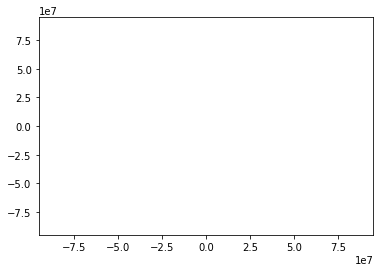

In [12]:
fig, ax = plt.subplots()
ln = [plt.plot([], [], 'ro')[0] for i in range(0, n_individu)]
patches = ln
 
#init
infection_individu = 0
walk_community=[]
community = []
for i in range(0, n_individu):
  random_healt_rate = random.uniform(0, 1);
  if infection_individu<=infection_ratio*n_individu:
    individu = Individu(random.randint(x_min, x_max), random.randint(y_min, y_max), True, False, 0)
    infection_individu+=1
  else:
    individu = Individu(random.randint(x_min, x_max), random.randint(y_min, y_max), False, False, 0)
  community.append(individu)
walk_community.append(community[:])

In [13]:
i = 1
while(infection_individu > 0):
  infection_individu = 0
  infected_per_day = 0
  community = []
  for j in range(0, n_individu):
    old_individu = walk_community[i-1][j]
    x = old_individu.x
    y = old_individu.y
    infected_status = old_individu.infected_status
    imunity_status = old_individu.imunity_status
    infection_time = old_individu.infection_time

    direction = 0
    move = random.uniform(0, 1)
    if(move <= move_probability):
      direction = random.randint(1, 4)

    if(direction == 1):
      y += 1
    elif(direction == 2):
      x += 1
    elif(direction == 3):
      x -= 1
    elif(direction == 4):
      y -= 1

    if(x<x_min):
      x = x_max + 1
    if(x>x_max):
      x = x_max - 1
    if(y<y_min):
      y = y_max + 1
    if(y>y_max):
      y = y_max - 1

    if(infected_status==True):
      infection_time += 1
      if(infection_time > recovery_time):
        imunity_status = True
        infected_status = False
    else:
      for other_individu in community:
        if(other_individu.x == x and other_individu.y == y and other_individu.infected_status==True and infected_status==False and imunity_status==False):
          infected_status = True
          infected_per_day+=1

    if(infected_status==True):
      infection_individu+=1

    individu = Individu(x, y, infected_status, imunity_status, infection_time)
    community.append(individu)
  walk_community.append(community[:])  
  print(f"Hari ke-{i}")
  print(f"-Terinfeksi Baru  : {infected_per_day}")
  print(f"-Terinfeksi Total : {infection_individu}")
  i+=1

print("Waktu Pemulihan :", i-1, "Hari")

Hari ke-1
-Terinfeksi Baru  : 4
-Terinfeksi Total : 15
Hari ke-2
-Terinfeksi Baru  : 4
-Terinfeksi Total : 19
Hari ke-3
-Terinfeksi Baru  : 1
-Terinfeksi Total : 20
Hari ke-4
-Terinfeksi Baru  : 5
-Terinfeksi Total : 25
Hari ke-5
-Terinfeksi Baru  : 4
-Terinfeksi Total : 29
Hari ke-6
-Terinfeksi Baru  : 4
-Terinfeksi Total : 33
Hari ke-7
-Terinfeksi Baru  : 6
-Terinfeksi Total : 39
Hari ke-8
-Terinfeksi Baru  : 9
-Terinfeksi Total : 48
Hari ke-9
-Terinfeksi Baru  : 4
-Terinfeksi Total : 52
Hari ke-10
-Terinfeksi Baru  : 7
-Terinfeksi Total : 59
Hari ke-11
-Terinfeksi Baru  : 2
-Terinfeksi Total : 50
Hari ke-12
-Terinfeksi Baru  : 7
-Terinfeksi Total : 53
Hari ke-13
-Terinfeksi Baru  : 3
-Terinfeksi Total : 52
Hari ke-14
-Terinfeksi Baru  : 4
-Terinfeksi Total : 55
Hari ke-15
-Terinfeksi Baru  : 5
-Terinfeksi Total : 55
Hari ke-16
-Terinfeksi Baru  : 4
-Terinfeksi Total : 55
Hari ke-17
-Terinfeksi Baru  : 5
-Terinfeksi Total : 56
Hari ke-18
-Terinfeksi Baru  : 3
-Terinfeksi Total : 53
H

In [14]:
def init():
    ax.set_xlim(x_min-1, x_max+1)
    ax.set_ylim(y_min-1, y_max+1)
    return patches

In [15]:
def update(i):
    for j, line in enumerate(ln):
        line.set_data(walk_community[i][j].x, walk_community[i][j].y)
        line.set_color(walk_community[i][j].color)
    return patches

No handles with labels found to put in legend.


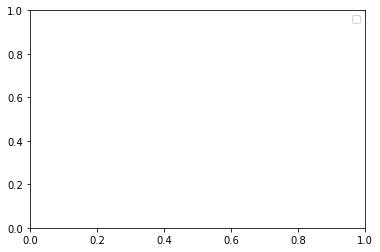

In [16]:
animation = FuncAnimation(fig, update, frames=len(walk_community), interval=100, init_func=init, blit=True)
plt.legend()
rc('animation', html='jshtml')
animation